## 5차시 과제

**Q1. Target Encoding의 문제점을 서술하고, 이를 극복하기 위한 방법을 찾아 작성해주세요. (15점)**

In [1]:
# Target Encoding은 이상치가 있는 경우에 오버피팅이 되기 쉽다.
# 그러한 문제를 해결하고자 노이즈를 추가한다던지 5-fold를 진행하는 방법이 있다.

**Q2. Grid Search와 Random Search의 차이점을 서술하고, 하이퍼 파라미터 튜닝에서 두 방법을 모두 이용한다면 어떠한 방식으로 이용할지 작성해주세요. (12점)**  
ex. Grid Search와 Random Search의 차이점은 ...이고, 만약 둘 다 이용한다면 ..를 먼저 사용하여 ...을 하고 그 후 ...을 사용하여 ...합니다.

In [2]:
#Grid Search는 하이퍼파라미터를 일정한 간격으로 변경하며 최적의 파라미터를 찾아가는 기법이다.
#Random Search는 임의의 하이퍼파라미터를 선정하는 과정을 통해 최적의 해를 찾아가는 기법이다.
#따라서 Rnadom Search를 먼저 사용하여 최적해를 가지는 파라미터 범위를 구하고 이후에 Grid Search로 정확한 해를 찾을 수 있다.

## 배운 내용을 활용하여 자유롭게 데이터 전처리, 모델 학습을 시키고 아래의 빈칸을 채워주세요.

### 자전거 수요 예측 데이터
    * year, month, day, hour
    * season: 계절
    * holiday: 1=주말을 제외한 국경일 등의 휴일, 0=휴일이 아닌 날
    * workingday: 1=주말 및 휴일이 아닌 주중, 0=주말 및 휴일
    * weather: 날씨
    * temp: 온도(섭씨)
    * atemp: 체감온도(섭씨)
    * humidity: 상대습도
    * windspeed: 풍속
    * registered: 사전에 등록된 사용자가 대여한 횟수
    * count: 대여 횟수 (target)

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns
import klib

train_df = pd.read_csv('./data/bike_train.csv')
test_df = pd.read_csv('./data/bike_test.csv')

display( train_df.head(5), test_df.head(5) )

,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
0,2012,3,13,18,봄,0,1,"맑음, 약간 구름 낀 흐림",28.70,31.820,34.0,19.9995,638,734
1,2012,4,16,22,여름,1,0,"맑음, 약간 구름 낀 흐림",27.88,31.820,51.0,16.9979,179,214
2,2011,12,9,21,겨울,0,1,"맑음, 약간 구름 낀 흐림",12.30,16.665,75.0,0.0000,131,140
3,2011,8,8,19,가을,0,1,"맑음, 약간 구름 낀 흐림",33.62,37.120,43.0,7.0015,352,416
4,2011,10,4,7,겨울,0,1,"맑음, 약간 구름 낀 흐림",17.22,21.210,82.0,19.0012,298,309


,year,month,day,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered
0,2011,10,7,20,겨울,0,1,"맑음, 약간 구름 낀 흐림",22.14,25.760,49.0,0.0000,167
1,2011,4,4,14,여름,0,1,"안개, 안개 + 흐림",30.34,32.575,27.0,32.9975,76
2,2012,2,18,7,봄,0,0,"맑음, 약간 구름 낀 흐림",9.84,14.395,70.0,0.0000,33
3,2012,5,12,3,여름,0,0,"맑음, 약간 구름 낀 흐림",19.68,23.485,59.0,0.0000,20
4,2012,5,12,6,여름,0,0,"맑음, 약간 구름 낀 흐림",17.22,21.210,67.0,6.0032,23


In [4]:
train_df.drop(['registered','atemp','year','month','day'], axis = 1, inplace = True)
test_df.drop(['registered','atemp','year','month','day'], axis = 1, inplace = True)

**Q3. 결측치가 있는지 확인하고 있다면 원하는 방식으로 처리하고 왜 그렇게 처리했는지 이유를 서술하세요. (8점)** 

In [5]:
print('train data 결측치 비율 \n')

for col in train_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * train_df[col].isnull().sum() / train_df[col].shape[0])
    print(msg)

train data 결측치 비율 

column:       hour	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.43%
column:   humidity	 Percent of NaN value: 1.21%
column:  windspeed	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


In [6]:
data_imp = train_df.copy()
data_imp.drop(['count','season','weather'], axis = 1, inplace = True)
data_imp

,hour,holiday,workingday,temp,humidity,windspeed
0,18,0,1,28.70,34.0,19.9995
1,22,1,0,27.88,51.0,16.9979
2,21,0,1,12.30,75.0,0.0000
3,19,0,1,33.62,43.0,7.0015
4,7,0,1,17.22,82.0,19.0012
...,...,...,...,...,...,...
7615,0,0,0,7.38,55.0,0.0000
7616,11,0,1,36.08,32.0,11.0014
7617,22,0,0,10.66,60.0,7.0015
7618,12,0,1,14.76,40.0,16.9979


In [7]:
data_imp_te = test_df.copy()
data_imp_te.drop(['season','weather'], axis = 1, inplace = True)
data_imp_te

,hour,holiday,workingday,temp,humidity,windspeed
0,20,0,1,22.14,49.0,0.0000
1,14,0,1,30.34,27.0,32.9975
2,7,0,0,9.84,70.0,0.0000
3,3,0,0,19.68,59.0,0.0000
4,6,0,0,17.22,67.0,6.0032
...,...,...,...,...,...,...
3261,6,0,1,12.30,65.0,16.9979
3262,21,1,0,16.40,76.0,19.9995
3263,11,0,0,25.42,53.0,6.0032
3264,18,0,1,16.40,NaN,19.9995


In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
value = imputer.fit_transform(data_imp)
data_imp = pd.DataFrame(columns = data_imp.columns, data = value)

In [9]:
np.round(data_imp.loc[train_df[train_df['temp'].isna()].index]['temp'])

327     16.0
388     12.0
724     29.0
749     20.0
1602    20.0
1770    21.0
2492    19.0
2510    23.0
2540    20.0
2609    19.0
2963    17.0
2975    23.0
3062    25.0
3205    23.0
4181    23.0
4390    24.0
4444    21.0
4736    24.0
5001    16.0
5212    16.0
5295    23.0
5631    15.0
5844    17.0
5871    20.0
6041    18.0
6272    19.0
6547    18.0
6672    21.0
6941    15.0
7127    13.0
7218    19.0
7416    23.0
7458    25.0
Name: temp, dtype: float64

In [10]:
train_df['temp'] = np.round(data_imp['temp'])
train_df['humidity'] = np.round(data_imp['humidity'])

In [11]:
value_te = imputer.transform(data_imp_te) 
data_imp_te = pd.DataFrame(columns = data_imp_te.columns, data = value_te)

In [12]:
test_df['temp'] = np.round(data_imp_te['temp'])
test_df['humidity'] = np.round(data_imp_te['humidity'])

In [13]:
data_imp.isnull().sum()

hour          0
holiday       0
workingday    0
temp          0
humidity      0
windspeed     0
dtype: int64

In [14]:
#null값이 있는 temp, atemp, humidity 피쳐에 대해 모두 5nn 방식을 적용해 주었다.
#mean값으로 단순대체보다 훨씬 편하고 정확할 것 같았기 때문이다.

**Q4. 이상치가 있는지 확인하고 있다면 원하는 방식으로 처리하고 왜 그렇게 처리했는지 이유를 서술하세요. (8점)** 

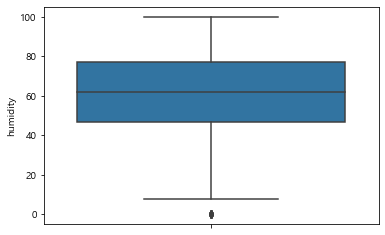

In [15]:
sns.boxplot(data = train_df, y = 'humidity')
plt.show()

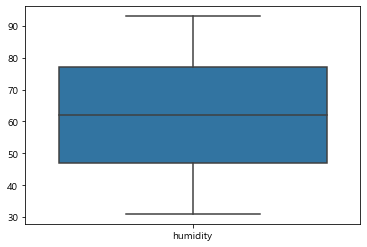

In [16]:
for i in ['humidity']:
    sns.boxplot(data = train_df[[i]].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0))
    plt.show(i)

In [17]:
#clip을 활용해 5%~95% 사이 값들만 보고자 했다.

**Q5. 범주형 변수를 원하는 방식으로 처리하고 왜 그렇게 처리했는지 이유를 서술하세요. (8점)** 

In [18]:
train_df = pd.get_dummies(train_df, columns=['hour','season','weather'])
test_df = pd.get_dummies(test_df, columns=['hour','season','weather'])

In [19]:
#카테고리컬한 데이터는 계절, 날씨에 대해 원핫인코딩을 진행
#타겟 인코딩을 굳이 할 필요가 없다고 판단했음

In [20]:
display( train_df.head(5), test_df.head(5) )

,holiday,workingday,temp,humidity,windspeed,count,hour_0,hour_1,hour_2,hour_3,...,hour_22,hour_23,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개","weather_안개, 안개 + 흐림"
0,0,1,29.0,34.0,19.9995,734,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,28.0,51.0,16.9979,214,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,1,12.0,75.0,0.0000,140,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,34.0,43.0,7.0015,416,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,17.0,82.0,19.0012,309,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


,holiday,workingday,temp,humidity,windspeed,hour_0,hour_1,hour_2,hour_3,hour_4,...,hour_21,hour_22,hour_23,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_안개, 안개 + 흐림"
0,0,1,22.0,49.0,0.0000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,30.0,27.0,32.9975,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,10.0,70.0,0.0000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,20.0,59.0,0.0000,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,17.0,67.0,6.0032,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


**Q6. 수치형 변수들의 분포를 확인하고 적절한 scaling 혹은 transform을 수행한 후, 왜 그렇게 처리했는지 이유를 서술하세요. (10점)** 

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [22]:
train_num = train_df[['temp','humidity']]
test_num = test_df[['temp','humidity']]

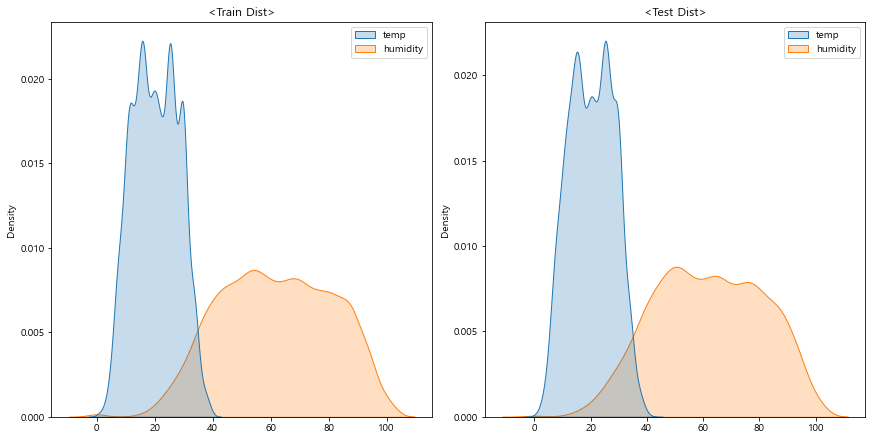

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num, shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num, shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [24]:
scaler = StandardScaler()

train_num[['temp','humidity']] = scaler.fit_transform(train_num)
test_num[['temp','humidity']] = scaler.transform(test_num)

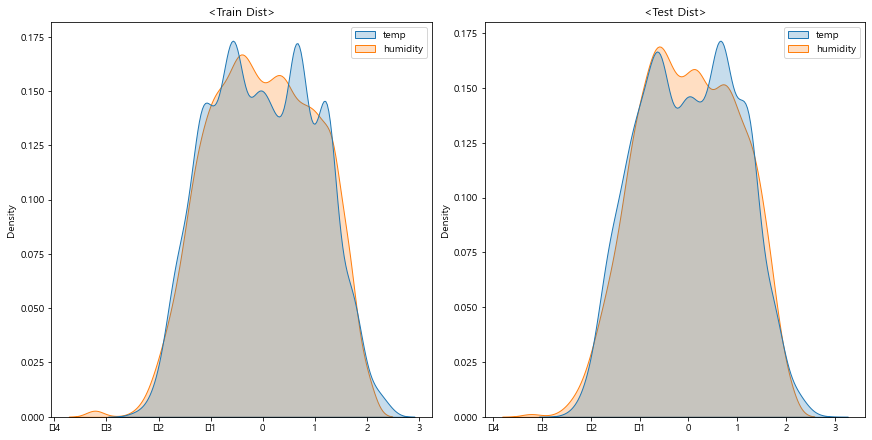

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num, shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num, shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [26]:
#정규분포의 형태를 만들고자 했다.

**Q7. 해당 데이터에 가장 적절한 PCA 방법을 적용하고 이유를 서술하세요. 만약, PCA가 필요없다고 판단했다면 그 근거를 적어주세요. (14점)** 

In [27]:
train_df.columns
train_df = train_df[['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'season_가을',
       'season_겨울', 'season_봄', 'season_여름', 'weather_가벼운 눈, 가벼운 비 + 천둥',
       'weather_맑음, 약간 구름 낀 흐림', 'weather_심한 눈/비, 천둥/번개',
       'weather_안개, 안개 + 흐림', 'count']]
train_df

,holiday,workingday,temp,humidity,windspeed,hour_0,hour_1,hour_2,hour_3,hour_4,...,hour_23,season_가을,season_겨울,season_봄,season_여름,"weather_가벼운 눈, 가벼운 비 + 천둥","weather_맑음, 약간 구름 낀 흐림","weather_심한 눈/비, 천둥/번개","weather_안개, 안개 + 흐림",count
0,0,1,29.0,34.0,19.9995,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,734
1,1,0,28.0,51.0,16.9979,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,214
2,0,1,12.0,75.0,0.0000,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,140
3,0,1,34.0,43.0,7.0015,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,416
4,0,1,17.0,82.0,19.0012,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,0,0,7.0,55.0,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,28
7616,0,1,36.0,32.0,11.0014,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,119
7617,0,0,11.0,60.0,7.0015,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,191
7618,0,1,15.0,40.0,16.9979,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,282


In [28]:
from sklearn.preprocessing import StandardScaler
train_scale = StandardScaler().fit_transform(train_df)

In [29]:
from sklearn.decomposition import PCA
train_pca = PCA().fit(train_scale) 

In [30]:
np.cumsum(train_pca.explained_variance_ratio_)

array([0.0679874 , 0.12305116, 0.16902923, 0.20723388, 0.24281508,
       0.27564721, 0.3077199 , 0.33781215, 0.36612748, 0.39369784,
       0.42122015, 0.4487233 , 0.47621845, 0.50370492, 0.53118472,
       0.55865476, 0.58611272, 0.6135701 , 0.64102403, 0.66846988,
       0.69591285, 0.72335138, 0.75077952, 0.77819302, 0.80557432,
       0.83292464, 0.86023127, 0.88749092, 0.91395165, 0.93930412,
       0.95954387, 0.97871691, 0.9890361 , 0.99510931, 1.        ,
       1.        , 1.        , 1.        ])

In [ ]:
train_pca = PCA(n_components= 29).fit_transform(train_scale) 

In [ ]:
print(train_pca)

**Q8. 적절한 모델을 선택하여 모델을 학습시키고 왜 해당 모델을 선택했는지 이유를 적어주세요. (11점)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1], test_size=0.3, random_state= 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

model_tree = RandomForestRegressor(random_state=42)
model_tree.fit(X_train,y_train)

print(model_tree.score(X_test,y_test))

**Q9. 하이퍼 파라미터 튜닝을 수행하고 전, 후 성능을 적어주세요. (14점)**